In [39]:
import fsps

In [40]:
import matplotlib.pyplot as plt

In [41]:
import numpy as np

In [42]:
sp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1, sfh=0, logzsol=0.0, dust_type=2, dust2=0.2)
sp.libraries
('mist', 'miles', 'DL07')

('mist', 'miles', 'DL07')

In [43]:
for param in sp.params.all_params:
    print(f"{param}: {sp.params[param]}")

imf_type: 2
imf_upper_limit: 120
imf_lower_limit: 0.08
imf1: 1.3
imf2: 2.3
imf3: 2.3
vdmc: 0.08
mdave: 0.5
dell: 0.0
delt: 0.0
sbss: 0.0
fbhb: 0.0
pagb: 1.0
add_stellar_remnants: True
tpagb_norm_type: 2
add_agb_dust_model: True
agb_dust: 1.0
redgb: 1.0
agb: 1.0
masscut: 150.0
fcstar: 1.0
evtype: -1
use_wr_spectra: 1
logt_wmb_hot: 0.0
add_xrb_emission: 0
frac_xrb: 1.0
smooth_lsf: False
smooth_velocity: True
redshift_colors: False
compute_light_ages: False
nebemlineinspec: True
dust_type: 2
add_dust_emission: True
add_neb_emission: False
add_neb_continuum: True
cloudy_dust: False
add_igm_absorption: False
zmet: 1
sfh: 0
wgp1: 1
wgp2: 1
wgp3: 1
tau: 1.0
const: 0.0
tage: 0.0
fburst: 0.0
tburst: 11.0
dust1: 0.0
dust2: 0.2
dust3: 0.0
logzsol: 0.0
zred: 0.0
pmetals: 2.0
dust_clumps: -99.0
frac_nodust: 0.0
dust_index: -0.7
dust_tesc: 7.0
frac_obrun: 0.0
uvb: 1.0
mwr: 3.1
dust1_index: -1.0
sf_start: 0.0
sf_trunc: 0.0
sf_slope: 0.0
duste_gamma: 0.01
duste_umin: 1.0
duste_qpah: 3.5
sigma_smooth: 

In [44]:
sdss_bands= fsps.find_filter('sdss')
print(sdss_bands)

['sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z']


In [45]:
sp.get_mags(tage=13.7, bands=sdss_bands)

array([9.86230134, 7.84737574, 6.96316166, 6.51453906, 6.09398344])

In [46]:
mags= sp.get_mags(tage=13.7, bands=sdss_bands)

In [47]:
mags_u=mags[0]
mags_g=mags[1] 
mags_r=mags[2]
mags_i=mags[3]
mags_z=mags[4]   

In [48]:
print(mags_u, mags_g,mags_r,mags_i,mags_z)

9.862301336028679 7.84737574264885 6.9631616608329665 6.514539055632696 6.093983438814433


In [49]:
sdss_bands

['sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z']

In [50]:
for filtro, mag in zip(sdss_bands, mags):
    print(f"Magnitud en banda {filtro} = {mag}")

Magnitud en banda sdss_u = 9.862301336028679
Magnitud en banda sdss_g = 7.84737574264885
Magnitud en banda sdss_r = 6.9631616608329665
Magnitud en banda sdss_i = 6.514539055632696
Magnitud en banda sdss_z = 6.093983438814433


In [51]:
sp.params['logzsol'] = -1

In [52]:
wave, spec = sp.get_spectrum(tage=13.7)
sp.formed_mass

1.0

In [53]:
sp.stellar_mass

0.576965333567041

In [60]:
sp = fsps.StellarPopulation(zcontinuous=1,add_neb_emission=1)
sp.params['logzsol'] = 0
sp.params['gas_logz'] = 0  #Metalicidad
sp.params['gas_logu'] = -2
wave, spec = sp.get_spectrum(tage=10,peraa=True)

In [61]:
si=sp.emline_wavelengths

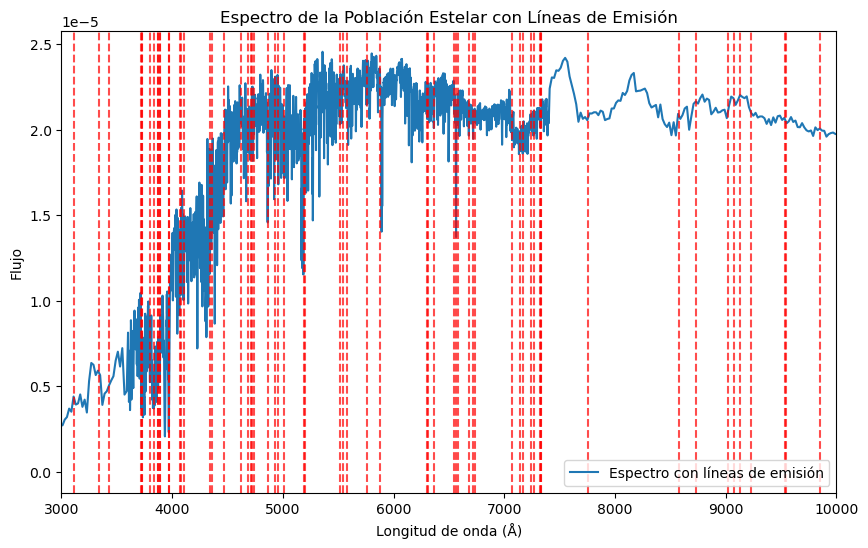

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(wave, spec, label='Espectro con líneas de emisión')
plt.xlabel('Longitud de onda (Å)')
plt.ylabel('Flujo')
plt.title('Espectro de la Población Estelar con Líneas de Emisión')
plt.xlim(3000, 10000)
plt.legend()
for wl in si:
    plt.axvline(wl, color='red', linestyle='--', alpha=0.7)

plt.show()


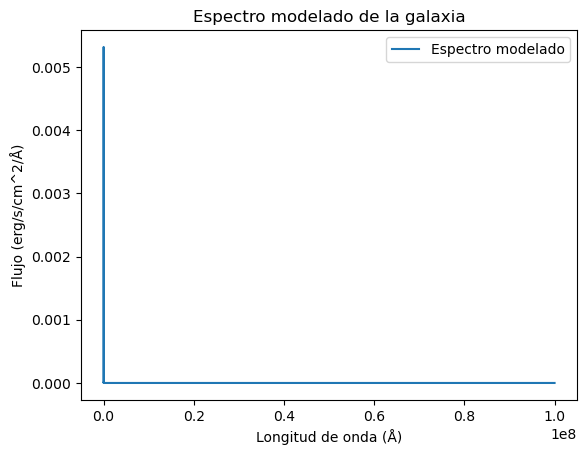

Tasa de Formación Estelar: 4.999999999999999e-10 M_sun/yr


In [58]:
import fsps
import numpy as np
import matplotlib.pyplot as plt

# Inicializa la población estelar
sp = fsps.StellarPopulation(zcontinuous=1, sfh=1, const=1.0)

# Configura los parámetros de la formación estelar
sp.params['logzsol'] = 0  # Metalicidad solar
sp.params['tau'] = 1.0    # Tiempo de decaimiento de la formación estelar en Gyr
sp.params['tage'] = 2.0   # Edad de la población estelar en Gyr

# Obtén el espectro
wave, spec = sp.get_spectrum(tage=2.0, peraa=True)

# Graficar el espectro
plt.plot(wave, spec, label='Espectro modelado')
plt.xlabel('Longitud de onda (Å)')
plt.ylabel('Flujo (erg/s/cm^2/Å)')
plt.title('Espectro modelado de la galaxia')
plt.legend()
plt.show()

# La SFR se puede derivar indirectamente dependiendo del modelo de formación estelar y el ajuste
sfr = sp.sfr
print(f"Tasa de Formación Estelar: {sfr} M_sun/yr")
